
# 01 – Isolation Forest

**Module:** Anomaly & Fraud Detection  
**Folder:** Classical ML Methods

This notebook demonstrates using **Isolation Forest**, a tree-based unsupervised algorithm,
for detecting anomalies in tabular datasets.


## Objective

Build a workflow that:
- Detects anomalies without labels
- Uses isolation depth as anomaly score
- Supports contamination parameter for expected fraction of anomalies
- Integrates into pipelines for monitoring


## Design Principles

✔ Unsupervised detection  
✔ Handles multivariate datasets  
✔ Contamination-based threshold  
✔ Pipeline-ready for production


## Imports and Setup


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

np.random.seed(2010)

## Simulated Dataset with Anomalies


In [99]:
data_normal = np.random.normal(50, 5, size=(1000, 2))
data_anomalies = np.array([[80, 80], [90, 90], [100, 100]])
data = np.vstack([data_normal, data_anomalies])
df = pd.DataFrame(data, columns=['feature_1','feature_2'])

## Fit Isolation Forest

In [102]:
df.head()

,feature_1,feature_2
0,49.471482,47.453517
1,53.672418,49.896006
2,37.919214,48.747621
3,53.600593,46.687212
4,41.291523,46.203054


In [104]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=2010)
iso_forest.fit(df)

IsolationForest(contamination=0.01, random_state=2010)

In [106]:
df['anomaly_score'] = iso_forest.decision_function(df)
df['anomaly_flag'] = iso_forest.predict(df.iloc[:,:-1])

In [108]:
# Convert output to 0 = normal, 1 = anomaly
df['anomaly_flag'] = df['anomaly_flag'].apply(lambda x: 0 if x==1 else 1)

## Summary


In [111]:
df['anomaly_flag'].value_counts()

anomaly_flag
0    992
1     11
Name: count, dtype: int64

## Visualization

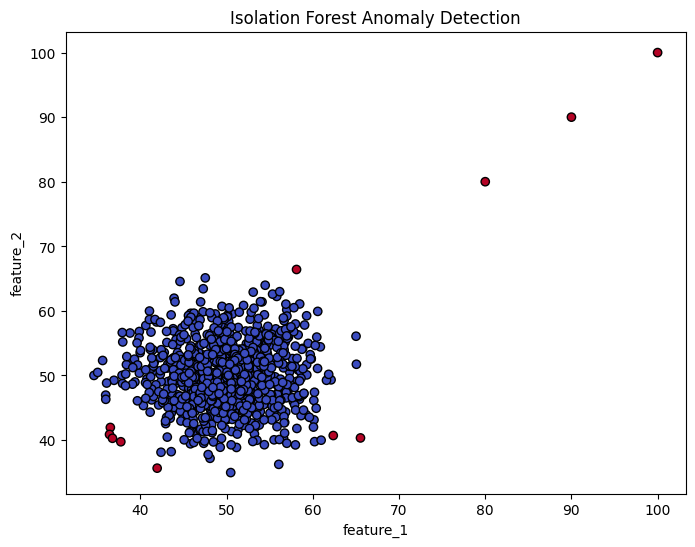

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(df['feature_1'], df['feature_2'], c=df['anomaly_flag'], cmap='coolwarm', edgecolor='k')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

## Integration Notes

- Isolation Forest works well for multidimensional data  
- Contamination parameter sets expected anomaly fraction  
- Scores can be used for thresholding or alerting  
- Can integrate into ensemble anomaly detection pipelines

## Production Checklist

✔ Fit only on training/historical data  
✔ Apply decision_function on new data  
✔ Contamination tuned to expected rate  
✔ Integrate anomaly scores into monitoring/alerts

## Key Takeaways

- Isolation Forest is effective for unsupervised anomaly detection  
- Works with multivariate numeric datasets  
- Produces interpretable anomaly scores and binary flags

## Next Steps

- Compare with One-Class SVM and Local Outlier Factor  
- Integrate into full anomaly detection pipeline  
- Monitor anomaly score drift over time